# Regularization and Shrinkage: Why do They Matter?

🔗 Materials: https://github.com/Imperial-College-Data-Science-Society/workshops/tree/master/notebooks/workshop-7

💻 Content covered:

- Motivation
- From linear regression to Ridge
- Connections with Principle Component Analysis
- Lasso
- Example

👾 This lecture will be held online on Microsoft Teams.

🔴 The event will be recorded and will be publicly available.

🎉 Attendance is FREE for members! Whether you are a student at Imperial College or not, sign up to be a member at https://www.icdss.club/joinus

⭐️ We encourage participants of this workshop to have looked at our previous sessions on YouTube. 

📖 A schedule of our lecture series is currently available

## Motivation and Setup
Given covariates $x_i = (x_{i1}, x_{i2}, \ldots, x_{id})^\intercal \in \mathbb{R}^d$ and response variables $y_i$, $i = 1, \ldots, n$, so that 
$$y_i = f(x_i) + \epsilon_i,
$$
where $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ is a Gaussian noise.   

For convenience, we write everything in matrix form: for $\epsilon \sim \mathcal{N}(0, \sigma^2 I_n)$,
$$
Y = f(X) + \epsilon,
$$
where $Y = (y1, \ldots, y_n)^\intercal$, and $X \in \mathbb{R}^{n \times d}$ whose $i$-th row is $x_i$.

E.g. $f(X) = \alpha_0 \mathbf{1} + X \beta_0$, $Y = X \beta_0 + \epsilon$。 In this case, $(\alpha_0, \beta_0) \in \mathbb{R}^{d + 1}$ are the true parameters.

Want to learn $f$.

## Linear regression

Assume $Y = \alpha_0 \mathbf{1} + x\beta_0$. 

Least-square (LS) solution: Find the optimal $(\hat{\alpha}, \hat{\beta}) \in \mathbb{R}^{d + 1}$ by minimizing the least-square error:
$$
(\hat{\alpha}, \hat{\beta}) = \mathrm{argmin}_{(\alpha, \beta) \in \mathbb{R}^{d + 1}} \| Y - \alpha \mathbf{1} - X\beta  \|_2^2. 
$$

Let $\tilde{X} = [\mathbf{1} \ X]$ be the design matrix with an intercept. Simple linear algebra gives the LS solution:
$$
(\hat{\alpha}, \hat{\beta}^\intercal)^\intercal = (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^\intercal Y.
$$

Caveat: For the LS solution to be well-defined, the $d \times d$ matrix $\tilde{X}^T \tilde{X}$ needs to be invertible, or equivalently, $\tilde{X}$ need to have full-rank ($n \geq d$).

Problem: What about when $d > > n$?

E.g. 1. In cancer prediction problems, it is common to have thousands of gene expressions as your covariates, but only a few hundreds of patients' record.

E.g. 2. In a customer behaviour analysis where you are given whether a customer has purchased a product from Amazon as the response, and some features (type of product, price, time of visit etc.) as covariates. You don't really want to *predict* buy/not buy, but to understand which features, amongst a handful of them, are most correlated to the purchase behaviour.

#### Summary
LS is good, but does not give us an answer when:
1. The problem is high-dimensional and we have more features than cases.
2. We are interested in selecting the features that are most "important".

## Ridge Regression

Ridge solution: Find the optimal $(\hat{\alpha}, \hat{\beta}) \in \mathbb{R}^{d + 1}$ by minimizing the least-square error **with $L_2$-penalty**:
$$
(\hat{\alpha}, \hat{\beta}) = \mathrm{argmin}_{(\alpha, \beta) \in \mathbb{R}^{d + 1}} \| Y - \alpha \mathbf{1} - X\beta  \|_2^2 
\color{red}{ + \lambda \| \beta \|_2^2 },
$$
where $\| \beta \|_2^2 = \sum_{j = 1}^d \beta_j^2$ is called the <span style="color:red">penalty/regularization term</span>, and $\lambda > 0$ is a hyperparameter we need to choose (often by cross-validation).

Why adding in a regularization helps?

Under some conditions (columns of $X$ are standardized to have zero mean and unit variance), the Ridge solution can be derived analytically:
\begin{align*}
\hat{\alpha} &= \frac{1}{n} \sum_{i = 1}^{n} Y_i = 0, \\
\hat{\beta} &= (X^\intercal X + \lambda I_n)^{-1} X^{\intercal}Y,
\end{align*}


**Key observations**: Comparing with LS solution $\hat{\beta} = (X^\intercal X)^{-1} X^{\intercal}Y$,
- $(X^\intercal X + \lambda I_n)$ is always invertible for **any** $X$, as long as $\lambda > 0$. So the Ridge solution is always well-defined.
- Adding the <span style="color:red">penalty term</span> **shrinks** the fitted coefficients in $\hat{\beta}$ towards zero (more on this later).
- $\hat{\beta}$ is now biased, but always has a smaller variance for a judicious choice of $\lambda$ (bias-variance trade-off):
<center>
Mean-Square Error = Variance + $\textrm{Bias}^2$.
</center>
- We normally do **not** penalize the intercept term!

### Choosing $\lambda$

The optimal $\lambda$ is often chosen by cross-validation:
1. Split training data into various subsets, called **folds**.
2. For each $\lambda$ over a pre-defined grid of values $\lambda_1, \ldots, \lambda_k$, calculate Ridge solution from all but one folds, compute out-of-sample error on the other fold, and repeat to get an averaged loss.
3. Pick the $\lambda$ that gave the smallest averaged cross-validation loss.

<img src="figs/cross_val.png" width="600"/>

## Connections with PCA

Idea of Principal Value Analaysis (PCA): 

Find the directions along which the **features** $X$ have the largest variance (i.e. most informative), and only look at the first few of them. 

- The variance is quantified by the **eigenvalues** of the matrix $X^\intercal X$. 
- The directions are given by the **eigenvectors**, called principal components (PCs).


**Principal component regression**: Use the first, say $s$, eigenvectors as the covariates, and perform least-square fit to find $\hat{\beta}$.

<div style="text-align:center"><img src="figs/PCA.png" width=500"/></div>

Principal component regression: 
- 1: Perform PCA to create PCs as our new input features
- 2: Use these PCs as input features to train our model for a least-square fit.
- 3: Transform these PCs back to the original input features, in order to make predictions on the actual dataset.

<img src="figs/pc_regression.png" width="600"/>

Adding the <span style="color:red">penalty term</span> in Ridge regression effectively shrinks the Ridge solution $\hat{\beta}$ according to the **eigenvalues** of the matrix $X^\intercal X$.


- Let $\hat{\beta}^{(LS)}$ = LS solution, $\hat{\beta}_s^{(PC)}$ = PC regression with $s$ PCs, $\hat{\beta}_\lambda^{(R)}$ = Ridge solution with regularization parameter $\lambda > 0$. 
- Let $D_1 \geq D_2 \geq \ldots \geq D_d$ be the eigenvalues of $X^\intercal X$ with corresponding eigenvectors $u_1, \ldots, u_d$. 


**Fact**: The fitted values can be rewritten as
\begin{align*}
X \hat{\beta}^{(LS)} &= \sum_{j = 1}^{d} (u_j^\intercal Y) u_j \\
X \hat{\beta}_s^{(PC)} &= \sum_{j = 1}^s (u_j^\intercal Y) u_j \\
X \hat{\beta}_\lambda^{(R)} &= \sum_{j = 1}^d \color{blue}{\frac{D_j^2}{D_j^2 + \lambda}} (u_j^\intercal Y) u_j 
\end{align*}

**Key observations**: 
- Ridge shrinks the directions with the smallest eigenvalues the most.
- $\lambda$ &#8593;, shrinkage &#8593;

## Lasso Regression

Lasso solution: Find the optimal $(\hat{\alpha}, \hat{\beta}) \in \mathbb{R}^{d + 1}$ by minimizing the least-square error **with $L_1$-penalty**:
$$
(\hat{\alpha}, \hat{\beta}) = \mathrm{argmin}_{(\alpha, \beta) \in \mathbb{R}^{d + 1}} \frac{1}{2}\| Y - \alpha \mathbf{1} - X\beta  \|_2^2 
\color{red}{ + \lambda \| \beta \|_1 },
$$
where $\| \beta \|_1 = \sum_{j = 1}^d |\beta_j|$, $\lambda > 0$ is a hyperparameter we need to choose.

<img src="figs/lasso_and_ridge.png" width="500"/>

**Key observations**:
- Lasso is more likely to give rise to $\hat{\beta}$ that are **exactly** zero.
- Lasso solutions has nice theoretical properties: with judicious choice of $\lambda$ and under regularity conditoins, $\hat{\beta} \approx \beta_0$ with high probability.
- Lasso can be combined with Ridge to give the *elastic net* penalty: for $\alpha \in [0, 1]$
$$
\lambda \left( \alpha \| \beta \|_2^2 + (1 - \alpha) \| \beta \|_1 \right).
$$

## Experiments (Prostate Cancer)
See the notebook here:

https://github.com/Imperial-College-Data-Science-Society/workshops/tree/master/notebooks/workshop-7

Adopted from *Elements of Statistical Learning, Example 3.2.1*

In [ ]:
url = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"
import pandas as pd
data = pd.read_csv(url, delimiter="\t")
data = data.iloc[:, 1:]
print("Shape:", data.shape)
data.head()

In [2]:
data_train = data.loc[data.train == "T"].drop("train", axis=1)
data_test = data.loc[data.train != "T"].drop("train", axis=1)
print("Train set:", data_train.shape, "Test set:", data_test.shape)

trainX = data_train.drop("lpsa", axis=1)
trainY = data_train.lpsa
testX = data_test.drop("lpsa", axis=1)
testY = data_test.lpsa

Train set: (67, 9) Test set: (30, 9)


### Utility functions

In [98]:
def compare_loss(model, alphas):
    '''Plot train and test errors for different 
    values of alphas.
    '''
    train_loss = []
    test_loss = []
    for a in alphas:
        ridge = model.set_params(alpha=a)
        ridge.fit(trainX, trainY)
        train_predY = ridge.predict(trainX)
        test_predY = ridge.predict(testX)
        
        train_loss.append(mean_squared_error(trainY, train_predY))
        test_loss.append(mean_squared_error(testY, test_predY))
    
    ax = plt.gca()
    ax.plot(alphas, train_loss, label="train")
    ax.plot(alphas, test_loss, label="test")
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.title('Loss as a function of the regularization')
    plt.axis('tight')
    plt.legend()

In [102]:
def fit_and_plot_hyperparams(model, alphas):
    '''Plot paths of fitted coefficients for different 
    values of alpha.
    '''
    coefs = []
    for a in alphas:
        ridge = model.set_params(alpha=a)
        ridge.fit(trainX, trainY)
        coefs.append(ridge.coef_)

    # Display results
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('Coefficients')
    plt.title('Coefficients as a function of regularization')
    plt.axis('tight')

In [100]:
def plot_cvloss(cvres, model):
    '''Plot CV loss for each values of alpha.
    '''
    ax = plt.gca()
    ax.set_xscale('log')
    ax.plot(cvres.param_alpha, - cvres.mean_test_score)
    plt.title("CV loss for different alpha (%s)" % model)
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.tight_layout()

### Linear regression

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

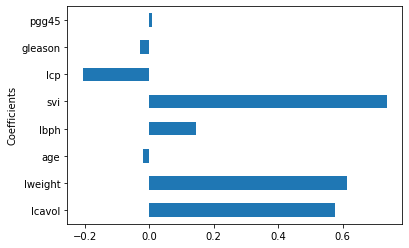

In [26]:
linreg = LinearRegression()
linreg.fit(trainX, trainY)
coeffs_df = pd.DataFrame(linreg.coef_, trainX.columns, columns=["lr"])
coeffs_df.lr.plot(kind="barh")
plt.ylabel("Coefficients")
plt.show()

In [5]:
linreg_predY = linreg.predict(testX)
linreg_loss = mean_squared_error(testY, linreg_predY)
print('MSE: %.5f' % linreg_loss)

MSE: 0.52127


### Ridge regression

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV, RepeatedKFold

ridgereg = Ridge(normalize=True)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
# define grid
grid = {"alpha": np.arange(0.01, 5, 0.01)}
# define search
search = GridSearchCV(ridgereg, grid, scoring="neg_mean_squared_error", cv=cv, n_jobs=2, return_train_score=True)
# perform the search
ridge_res = search.fit(trainX, trainY)
ridgecv = pd.DataFrame(ridge_res.cv_results_)

In [37]:
ridge = ridge_res.best_estimator_
ridge_predY = ridge.predict(testX)
ridge_loss = mean_squared_error(testY, ridge_predY)

print('MSE: %.5f' % ridge_loss)
print('Best alpha: %s' % ridge_res.best_params_)

MSE: 0.50235
Best alpha: {'alpha': 0.04}


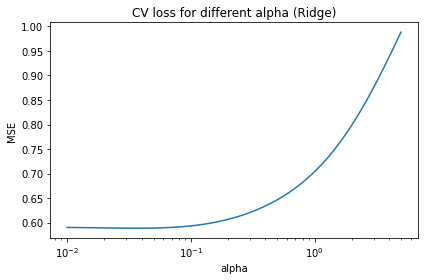

In [39]:
plot_cvloss(ridgecv, "Ridge")

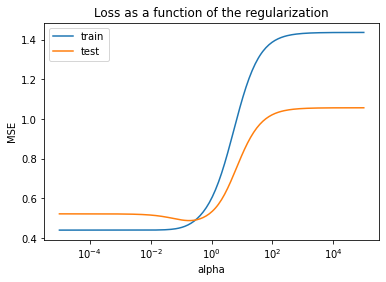

In [57]:
alphas = np.logspace(-5, 5, 200)
compare_loss(Ridge(normalize=True), alphas = alphas)

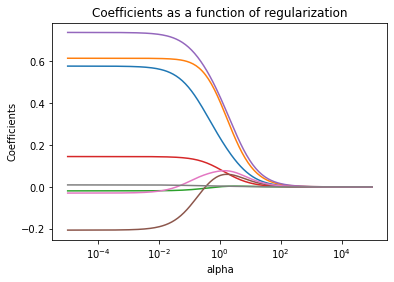

In [66]:
alphas = np.logspace(-5, 5, 200)
fit_and_plot_hyperparams(Ridge(normalize=True), alphas = alphas)

### Lasso

In [48]:
lassoreg = Lasso(normalize=True)
# define search
grid = {"alpha": np.arange(0.0001, 0.05, 0.0001)}
lasso_search = GridSearchCV(lassoreg, grid, scoring="neg_mean_squared_error", cv=cv, n_jobs=2)
# perform the search
lasso_res = lasso_search.fit(trainX, trainY)
lassocv = pd.DataFrame(lasso_res.cv_results_)

In [51]:
lasso = lasso_res.best_estimator_
lasso_predY = lasso.predict(testX)
lasso_loss = mean_squared_error(testY, lasso_predY)

print('MSE: %.5f' % lasso_loss)
print('Best alpha: %s' % lasso_res.best_params_)

MSE: 0.49371
Best alpha: {'alpha': 0.0016}


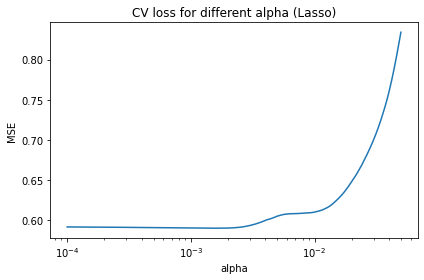

In [59]:
plot_cvloss(lassocv, "Lasso")

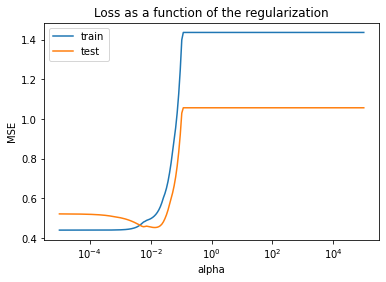

In [61]:
alphas = np.logspace(-5, 5, 200)
compare_loss(Lasso(normalize=True), alphas = alphas)

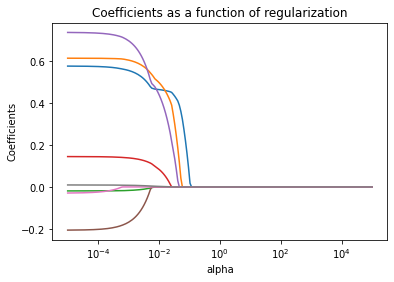

In [88]:
fit_and_plot_hyperparams(Lasso(normalize=True), alphas = alphas)

### Elastic net

In [62]:
enet = ElasticNet(normalize=True)
# define search
grid = {
    "alpha": np.arange(0.001, 0.04, 0.001),
    "l1_ratio": [1e-3, 1e-2, 1e-1, 0.5, 0.75]
}
enet_search = GridSearchCV(enet, grid, scoring="neg_mean_squared_error", cv=cv, n_jobs=2)
# perform the search
enet_res = enet_search.fit(trainX, trainY)
enetcv = pd.DataFrame(enet_res.cv_results_)

In [63]:
enet = enet_res.best_estimator_
enet_predY = enet.predict(testX)
enet_loss = mean_squared_error(testY, enet_predY)

print('MSE: %.5f' % enet_loss)
print('Best params: %s' % enet_res.best_params_)

MSE: 0.49611
Best params: {'alpha': 0.001, 'l1_ratio': 0.1}


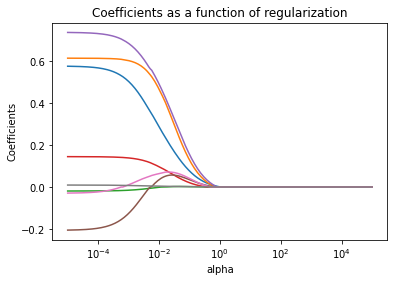

In [96]:
fit_and_plot_hyperparams(
    ElasticNet(normalize=True, l1_ratio=enet_res.best_params_["l1_ratio"]), 
    alphas = alphas
)

### Plot fitted coefficients

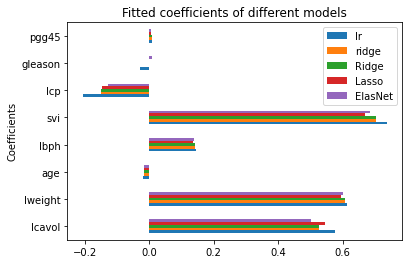

In [69]:
coeffs_df["Ridge"] = ridge.coef_
coeffs_df["Lasso"] = lasso.coef_
coeffs_df["ElasNet"] = enet.coef_

coeffs_df.plot(kind="barh")
plt.ylabel("Coefficients")
plt.title("Fitted coefficients of different models")
plt.show()

|       |       | Summary |     |           |
| :---: | :---: |  :---:  |  :---:  |   :---:   |
| Model | LR    |  Ridge  |  Lasso  |  ElasNet  |
| MSE   | 0.521 |  0.502  |  0.494  |  0.496    |

## Other Forms of Regularization

1. Other penalty functions: $L_q, q > 0$, grouped lasso.
2. The SVM obective can be written in a form involving a regularization term.
3. Dropouts in neural network.
4. Double descent (overfitting leads to lower out-of-sample error).

## References
Hastie, Trevor, Tibshirani, Robert and Friedman, Jerome. *The Elements of Statistical Learning*. New York, NY, USA: Springer New York Inc., 2001.

Rajen Shah. Lecture Notes on Modern Statistical Methods. 2019. http://www.statslab.cam.ac.uk/~rds37/teaching/modern_stat_methods/notes_MSM.pdf